In [1]:
import lightgbm as lgb
import pandas as pd # 基本ライブラリ
import numpy as np # 基本ライブラリ
import matplotlib.pyplot as plt # グラフ描画用
from sklearn.model_selection import train_test_split # データセット分割用
from sklearn.metrics import accuracy_score # モデル評価用(正答率)
from sklearn.metrics import log_loss # モデル評価用(logloss)
from sklearn.metrics import roc_auc_score # モデル評価用(auc)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE

import glob

# データフレームを綺麗に出力する関数
import IPython
def display(*dfs, head=True):
    for df in dfs:
        IPython.display.display(df.head() if head else df)

In [2]:
files_all_data = sorted(glob.glob("dataset/place/*"))
files_features = sorted(glob.glob("dataset/v1_features/place/*"))
for all_data, feature in zip(files_all_data, files_features):
    print(all_data,feature)
    hoge = pd.read_csv(f"{all_data}", index_col=0)
    X_df = pd.read_csv(f"{feature}",index_col=0)
    X = X_df.values
    Y = hoge["tkt_1t"].values
    odds = hoge["odds_1t"]
    X_train, X_test, y_train, y_test, odds_train, odds_test = train_test_split(X, Y, odds,test_size=0.20,shuffle=False)
    # モデルの学習
    model = lgb.LGBMClassifier() # モデルのインスタンスの作成
    model.fit(X_train, y_train) # モデルの学習

    # テストデータの予測クラス (予測クラス(0 or 1 or 2)を返す)
    y_pred = model.predict(X_test)
    # テストデータのクラス予測確率 (各クラスの予測確率 [クラス0の予測確率,クラス1の予測確率,クラス2の予測確率] を返す)
    y_pred_prob = model.predict_proba(X_test)

    # 真値と予測値の表示
    df_pred = pd.DataFrame({'target':y_test,'target_pred':y_pred})


    # 真値と予測確率の表示
    df_pred_prob = pd.DataFrame({'y':y_test, 'target0_prob':y_pred_prob[:,0], 'target1_prob':y_pred_prob[:,1], 'target2_prob':y_pred_prob[:,2], 'target3_prob':y_pred_prob[:,3], 'target4_prob':y_pred_prob[:,4], 'target5_prob':y_pred_prob[:,5]})
    val_mat = confusion_matrix(y_test, y_pred)
    print(val_mat)



    rec_score = recall_score(y_test, y_pred, average=None)
    print(rec_score)

    print(classification_report(y_test, y_pred))

dataset/place/三国.csv dataset/v1_features/place/三国_v1.csv
[[200   8   5   0   0   0]
 [ 36   9   3   0   0   0]
 [ 33   3   5   2   0   2]
 [ 26   3   5   3   0   0]
 [ 12   1   0   0   2   0]
 [  7   0   0   0   0   0]]
[0.93896714 0.1875     0.11111111 0.08108108 0.13333333 0.        ]
              precision    recall  f1-score   support

           1       0.64      0.94      0.76       213
           2       0.38      0.19      0.25        48
           3       0.28      0.11      0.16        45
           4       0.60      0.08      0.14        37
           5       1.00      0.13      0.24        15
           6       0.00      0.00      0.00         7

    accuracy                           0.60       365
   macro avg       0.48      0.24      0.26       365
weighted avg       0.56      0.60      0.52       365

dataset/place/下関.csv dataset/v1_features/place/下関_v1.csv
[[211   1   9   3   2   0]
 [ 39   2   4   0   0   0]
 [ 20   1   5   0   0   0]
 [ 32   2   0   1   0   0]
 [ 2

/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[216  11  11   3   1   0]
 [ 44   9   7   3   0   1]
 [ 40   5   5   1   1   0]
 [ 38   3   2   2   0   0]
 [ 18   1   1   0   0   0]
 [  5   0   1   0   0   0]]
[0.89256198 0.140625   0.09615385 0.04444444 0.         0.        ]
              precision    recall  f1-score   support

           1       0.60      0.89      0.72       242
           2       0.31      0.14      0.19        64
           3       0.19      0.10      0.13        52
           4       0.22      0.04      0.07        45
           5       0.00      0.00      0.00        20
           6       0.00      0.00      0.00         6

    accuracy                           0.54       429
   macro avg       0.22      0.20      0.19       429
weighted avg       0.43      0.54      0.46       429

dataset/place/唐津.csv dataset/v1_features/place/唐津_v1.csv
[[173  13   7   4   0   1]
 [ 39  15   5   2   0   0]
 [ 38   3   8   1   1   0]
 [ 31   4   3   4   0   0]
 [ 19   2   3   0   2   0]
 [  7   1   1   2   0   1]]
[0.873

/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[261   8   2   3   0   0]
 [ 40   6   0   1   1   0]
 [ 35   1   3   1   0   0]
 [ 32   0   3   2   0   0]
 [ 17   0   0   1   0   0]
 [ 10   2   0   1   0   2]]
[0.95255474 0.125      0.075      0.05405405 0.         0.13333333]
              precision    recall  f1-score   support

           1       0.66      0.95      0.78       274
           2       0.35      0.12      0.18        48
           3       0.38      0.07      0.12        40
           4       0.22      0.05      0.09        37
           5       0.00      0.00      0.00        18
           6       1.00      0.13      0.24        15

    accuracy                           0.63       432
   macro avg       0.44      0.22      0.24       432
weighted avg       0.55      0.63      0.54       432

dataset/place/宮島.csv dataset/v1_features/place/宮島_v1.csv
[[241   6   3   3   0   0]
 [ 27   7   1   1   0   0]
 [ 41   4   4   1   0   0]
 [ 35   4   1   1   0   0]
 [ 30   1   2   0   0   0]
 [ 14   1   0   1   0   0]]
[0.952

/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[199   2   1   2   0   0]
 [ 40   5   1   0   0   0]
 [ 39   7   3   2   0   1]
 [ 37   4   2   0   0   0]
 [ 21   0   0   0   0   0]
 [  7   0   0   0   0   0]]
[0.9754902  0.10869565 0.05769231 0.         0.         0.        ]
              precision    recall  f1-score   support

           1       0.58      0.98      0.73       204
           2       0.28      0.11      0.16        46
           3       0.43      0.06      0.10        52
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00        21
           6       0.00      0.00      0.00         7

    accuracy                           0.55       373
   macro avg       0.21      0.19      0.16       373
weighted avg       0.41      0.55      0.43       373

dataset/place/常滑.csv dataset/v1_features/place/常滑_v1.csv


/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[204   9   5   1   0   1]
 [ 37   9   5   1   0   1]
 [ 31   3   5   0   0   0]
 [ 38   5   0   0   0   0]
 [ 23   3   1   0   0   0]
 [  7   1   2   0   0   0]]
[0.92727273 0.16981132 0.12820513 0.         0.         0.        ]
              precision    recall  f1-score   support

           1       0.60      0.93      0.73       220
           2       0.30      0.17      0.22        53
           3       0.28      0.13      0.18        39
           4       0.00      0.00      0.00        43
           5       0.00      0.00      0.00        27
           6       0.00      0.00      0.00        10

    accuracy                           0.56       392
   macro avg       0.20      0.20      0.19       392
weighted avg       0.40      0.56      0.46       392

dataset/place/平和島.csv dataset/v1_features/place/平和島_v1.csv


/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[122  12   4   6   2   1]
 [ 35  19   6   3   2   0]
 [ 33   6   5   3   0   1]
 [ 34   6   1   1   0   1]
 [ 10   4   0   0   1   0]
 [ 11   0   0   0   0   0]]
[0.82993197 0.29230769 0.10416667 0.02325581 0.06666667 0.        ]
              precision    recall  f1-score   support

           1       0.50      0.83      0.62       147
           2       0.40      0.29      0.34        65
           3       0.31      0.10      0.16        48
           4       0.08      0.02      0.04        43
           5       0.20      0.07      0.10        15
           6       0.00      0.00      0.00        11

    accuracy                           0.45       329
   macro avg       0.25      0.22      0.21       329
weighted avg       0.37      0.45      0.38       329

dataset/place/徳山.csv dataset/v1_features/place/徳山_v1.csv
[[235  13   6   3   0   0]
 [ 41   6   0   0   0   0]
 [ 27   3   5   2   0   0]
 [ 28   0   2   1   0   0]
 [ 14   1   0   0   0   0]
 [ 10   2   0   0   0   0]]
[0.914

/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[131   5   9  16   1   0]
 [ 47  14  11   7   0   0]
 [ 36   5  13   6   0   0]
 [ 32   4   8   7   0   0]
 [ 24   1   4   1   0   0]
 [ 15   2   1   0   0   0]]
[0.80864198 0.17721519 0.21666667 0.1372549  0.         0.        ]
              precision    recall  f1-score   support

           1       0.46      0.81      0.59       162
           2       0.45      0.18      0.25        79
           3       0.28      0.22      0.25        60
           4       0.19      0.14      0.16        51
           5       0.00      0.00      0.00        30
           6       0.00      0.00      0.00        18

    accuracy                           0.41       400
   macro avg       0.23      0.22      0.21       400
weighted avg       0.34      0.41      0.34       400

dataset/place/桐生.csv dataset/v1_features/place/桐生_v1.csv


/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[186  12   6  13   2   2]
 [ 42  10   2   3   0   0]
 [ 43   5   3   5   0   0]
 [ 27   4   3   8   0   0]
 [ 16   0   1   4   3   0]
 [  7   1   0   1   0   0]]
[0.84162896 0.1754386  0.05357143 0.19047619 0.125      0.        ]
              precision    recall  f1-score   support

           1       0.58      0.84      0.69       221
           2       0.31      0.18      0.22        57
           3       0.20      0.05      0.08        56
           4       0.24      0.19      0.21        42
           5       0.60      0.12      0.21        24
           6       0.00      0.00      0.00         9

    accuracy                           0.51       409
   macro avg       0.32      0.23      0.24       409
weighted avg       0.44      0.51      0.45       409

dataset/place/江戸川.csv dataset/v1_features/place/江戸川_v1.csv
[[116  13   9   4   4   0]
 [ 47  15   3   1   0   1]
 [ 43   7   7   1   2   0]
 [ 30   9   3   6   0   0]
 [ 21   1   4   3   2   0]
 [ 13   0   1   0   0   0]]
[0.7

/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[195  12   8   2   3   1]
 [ 52  13   3   0   1   0]
 [ 41   3   3   1   0   0]
 [ 24   4   1   2   0   0]
 [ 14   2   1   1   0   0]
 [ 14   1   0   1   0   0]]
[0.88235294 0.1884058  0.0625     0.06451613 0.         0.        ]
              precision    recall  f1-score   support

           1       0.57      0.88      0.70       221
           2       0.37      0.19      0.25        69
           3       0.19      0.06      0.09        48
           4       0.29      0.06      0.11        31
           5       0.00      0.00      0.00        18
           6       0.00      0.00      0.00        16

    accuracy                           0.53       403
   macro avg       0.24      0.20      0.19       403
weighted avg       0.42      0.53      0.44       403

dataset/place/琵琶湖.csv dataset/v1_features/place/琵琶湖_v1.csv
[[204  10  12   5   2   0]
 [ 47   9   4   1   0   0]
 [ 39   1   3   3   1   1]
 [ 32   2   0   4   2   0]
 [  9   1   1   0   0   0]
 [  4   2   1   0   0   0]]
[0.8

/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[182  11  11   8   0   0]
 [ 39  14   3   2   0   0]
 [ 33   4   4   2   0   0]
 [ 35   5   0   1   0   0]
 [ 27   2   2   0   1   0]
 [ 11   1   1   0   0   0]]
[0.85849057 0.24137931 0.09302326 0.02439024 0.03125    0.        ]
              precision    recall  f1-score   support

           1       0.56      0.86      0.68       212
           2       0.38      0.24      0.29        58
           3       0.19      0.09      0.12        43
           4       0.08      0.02      0.04        41
           5       1.00      0.03      0.06        32
           6       0.00      0.00      0.00        13

    accuracy                           0.51       399
   macro avg       0.37      0.21      0.20       399
weighted avg       0.46      0.51      0.42       399

dataset/place/鳴門.csv dataset/v1_features/place/鳴門_v1.csv


/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

[[163   6   7   5   0   0]
 [ 35  15   2   2   0   0]
 [ 42   2   9   3   0   0]
 [ 33   2   4   2   0   0]
 [ 15   4   1   1   1   0]
 [  3   0   0   1   0   0]]
[0.90055249 0.27777778 0.16071429 0.04878049 0.04545455 0.        ]
              precision    recall  f1-score   support

           1       0.56      0.90      0.69       181
           2       0.52      0.28      0.36        54
           3       0.39      0.16      0.23        56
           4       0.14      0.05      0.07        41
           5       1.00      0.05      0.09        22
           6       0.00      0.00      0.00         4

    accuracy                           0.53       358
   macro avg       0.44      0.24      0.24       358
weighted avg       0.50      0.53      0.45       358



/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [3]:
df_pred.to_csv("tmp.csv" , encoding='utf_8_sig')

In [4]:
np.unique(y_train)

array([1, 2, 3, 4, 5, 6])

In [5]:
val_mat = confusion_matrix(y_test, y_pred)

In [6]:
val_mat

array([[163,   6,   7,   5,   0,   0],
       [ 35,  15,   2,   2,   0,   0],
       [ 42,   2,   9,   3,   0,   0],
       [ 33,   2,   4,   2,   0,   0],
       [ 15,   4,   1,   1,   1,   0],
       [  3,   0,   0,   1,   0,   0]])

In [7]:
accuracy_score(y_test, y_pred)

0.5307262569832403

In [8]:
rec_score = recall_score(y_test, y_pred, average=None)
print(rec_score)

[0.90055249 0.27777778 0.16071429 0.04878049 0.04545455 0.        ]


In [9]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.56      0.90      0.69       181
           2       0.52      0.28      0.36        54
           3       0.39      0.16      0.23        56
           4       0.14      0.05      0.07        41
           5       1.00      0.05      0.09        22
           6       0.00      0.00      0.00         4

    accuracy                           0.53       358
   macro avg       0.44      0.24      0.24       358
weighted avg       0.50      0.53      0.45       358



/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/naoki/.pyenv/versions/kyoutei2/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [10]:
kane = 0
tousi = 0
for target ,pred_i, odds_i in zip(y_test, y_pred, odds):
    if target == pred_i:
        kane += odds_i * 100
    tousi += 100


kane / tousi

2.3016759776536313

<AxesSubplot:xlabel='0'>

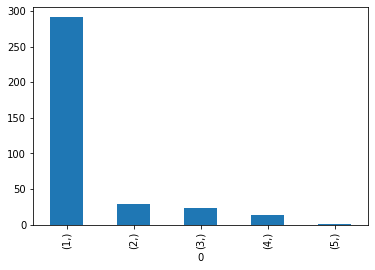

In [11]:
pd.DataFrame(y_pred).value_counts().plot(kind="bar")

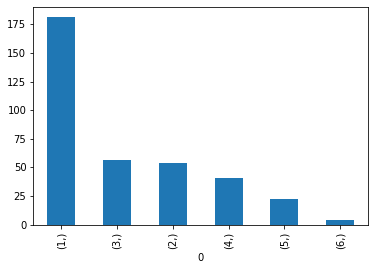

In [13]:
pd.DataFrame(y_test).value_counts().plot(kind="bar")
sm = SMOTE()
x_resampled, y_resampled = sm.fit_resample(X_train, y_train)

In [15]:
x_resampled.shape

(4266, 60)

In [16]:

y_resampled.shape

(4266,)

In [17]:
X_train.shape

(1431, 60)

<AxesSubplot:xlabel='0'>

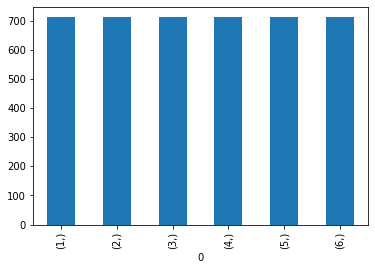

In [18]:
pd.DataFrame(y_resampled).value_counts().plot(kind="bar")